In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

## load

In [3]:
mc_meta = pd.read_csv('/home/qzeng/project/aging/metadata/240104_mC_META.csv', index_col = 0)
mc_meta = mc_meta[['Age','mCHFrac','mCGFrac','AgingMajorType','Replicate']].copy()
mc_meta.head()

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Age,mCHFrac,mCGFrac,AgingMajorType,Replicate
cell,,,,,
AMB_200205_9mo_2A_3A_1_P1-1-F3-A1,9mo,0.028446,0.813065,L6 CT CTX Glut,rep1
AMB_200205_9mo_2A_3A_1_P1-1-F3-A13,9mo,0.024080,0.788063,L2/3 IT CTX Glut,rep1
AMB_200205_9mo_2A_3A_1_P1-1-F3-A14,9mo,0.029123,0.769750,L2/3 IT CTX Glut,rep1
AMB_200205_9mo_2A_3A_1_P1-1-F3-A2,9mo,0.034284,0.822170,Pvalb Gaba,rep1
AMB_200205_9mo_2A_3A_1_P1-1-F3-B1,9mo,0.025452,0.786658,L4/5 IT CTX Glut,rep1


In [4]:
mc_meta['Replicate'].value_counts()

rep1    67403
rep2    65148
Name: Replicate, dtype: int64

In [5]:
m3c_meta = pd.read_csv('/home/qzeng/project/aging/metadata/240104_m3C_META.csv', index_col = 0)
m3c_meta = m3c_meta[['Age','mCHFrac','mCGFrac','AgingMajorType','Replicate']].copy()
m3c_meta.head()

,Age,mCHFrac,mCGFrac,AgingMajorType,Replicate
cell,,,,,
AMB_220628_18mo_3F_4E_1_P1-1-I3-A1,18mo,0.022716,0.785355,STR D1 Gaba,rep2
AMB_220628_18mo_3F_4E_1_P1-1-I3-A13,18mo,0.017524,0.777619,STR D1 Sema5a Gaba,rep2
AMB_220628_18mo_3F_4E_1_P1-1-I3-A14,18mo,0.008727,0.754359,Astro-TE NN,rep2
AMB_220628_18mo_3F_4E_1_P1-1-I3-A2,18mo,0.025239,0.790736,STR D2 Gaba,rep2
AMB_220628_18mo_3F_4E_1_P1-1-I3-B1,18mo,0.023158,0.782989,STR D1 Gaba,rep2


In [6]:
m3c_meta['Replicate'].value_counts()

rep1    38320
rep2    34346
Name: Replicate, dtype: int64

In [7]:
tmpdf = mc_meta.groupby(['AgingMajorType','Age'])[['mCHFrac','mCGFrac']].mean()
tmpdf.loc['DG Glut']

,mCHFrac,mCGFrac
Age,,
18mo,0.011077,0.736360
8wk,0.010496,0.728890
9mo,0.011848,0.749627


In [16]:

import joblib
use_cts = joblib.load('/home/qzeng/project/aging/metadata/shared_use_cts')

all_change= {}
for ct , tmpdf in m3c_meta.groupby('AgingMajorType'):
    if ct in use_cts:
        _mch = tmpdf.groupby('Age')['mCHFrac'].mean()
        _mch = _mch['18mo'] - _mch['8wk']

        _mcg = tmpdf.groupby('Age')['mCGFrac'].mean()
        _mcg = _mcg['18mo'] - _mcg['8wk']
        all_change[ct] = (_mch, _mcg)
    
all_change= pd.DataFrame(all_change).T  
all_change.columns = ['mCH','mCG']
all_change['mCH']= abs(all_change['mCH'])
all_change['mCG']= abs(all_change['mCG'])

In [14]:
all_change['mCG'].describe()

count    36.000000
mean      0.007665
std       0.005560
min       0.000246
25%       0.002606
50%       0.006501
75%       0.013285
max       0.016305
Name: mCG, dtype: float64

In [17]:
all_change['mCG'].describe()

count    36.000000
mean      0.005623
std       0.004351
min       0.000009
25%       0.002817
50%       0.004868
75%       0.008167
max       0.014986
Name: mCG, dtype: float64

## plot global

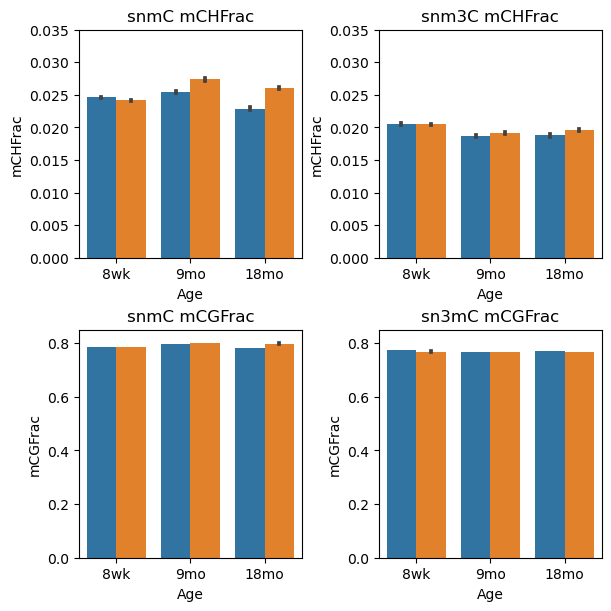

In [42]:

fig,axes = plt.subplots(figsize = (6,6),ncols = 2, nrows =2, dpi = 100, constrained_layout= True)

ax = axes[0,0]
_var = 'mCHFrac'
sns.barplot(data=mc_meta, 
            ax = ax,
            x="Age", 
            y=_var, 
            order = ['8wk','9mo','18mo'],
            hue="Replicate")
ax.set_title(f"snmC {_var}")
ax.set_ylim(0,0.035)
ax.legend().remove()

ax = axes[0,1]
_var = 'mCHFrac'
sns.barplot(data=m3c_meta, 
            ax = ax,
            x="Age", 
            y=_var, 
            order = ['8wk','9mo','18mo'],
            hue="Replicate")
ax.set_title(f"snm3C {_var}")
ax.set_ylim(0,0.035)
ax.legend().remove()

ax = axes[1,0]
_var = 'mCGFrac'
sns.barplot(data=mc_meta, 
            ax = ax,
            x="Age", 
            y=_var, 
            order = ['8wk','9mo','18mo'],
            hue="Replicate")
ax.set_title(f"snmC {_var}")
ax.set_ylim(0,0.85)
ax.legend().remove()

ax = axes[1,1]
_var = 'mCGFrac'
sns.barplot(data=m3c_meta, 
            ax = ax,
            x="Age", 
            y=_var, 
            order = ['8wk','9mo','18mo'],
            hue="Replicate")
ax.set_title(f"sn3mC {_var}")
ax.set_ylim(0,0.85)
ax.legend().remove()

#fig.savefig(f'figure/All.Global.Methylation.pdf',  bbox_inches="tight")                  

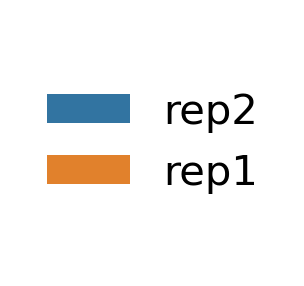

In [43]:
# Create a second subplot for the legend
fig_legend, ax_legend = plt.subplots(figsize=(1, 1), dpi=300)
# Plot an empty plot for the legend
ax_legend.plot([], [])
# Set the legend using the handles and labels from the previous subplot
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', frameon=False)
# Remove ticks and labels from the legend subplot
ax_legend.axis('off')

# Show both the bar plot and the legend
plt.show()

fig_legend.savefig(f'figure/rep_legend.pdf',  bbox_inches="tight")   

## plot by cell type

In [7]:
import joblib
use_cts = joblib.load('/home/qzeng/project/aging/metadata/shared_use_cts')

In [9]:
mc_meta = mc_meta[mc_meta['AgingMajorType'].isin(use_cts)]
m3c_meta = m3c_meta[m3c_meta['AgingMajorType'].isin(use_cts)]

In [20]:
ordered_shared_cts = ['Microglia NN','OPC NN','Oligo NN','Astro-NT NN','Astro-TE NN',
 'DG Glut','CA1-ProS Glut','CA3 Glut','SUB-ProS Glut',
 'L2/3 IT CTX Glut','L4/5 IT CTX Glut','L5 IT CTX Glut','L6 IT CTX Glut',
 'L2/3 IT PPP Glut','L2/3 IT ENT Glut','L6b/CT ENT Glut',
 'L5 ET CTX Glut','L5 NP CTX Glut','L6 CT CTX Glut',
 'MEA-COA Glut','LA-BLA-BMA-PA Glut','PB Evx2 Glut','PAG Glut',
 'STR D1 Gaba','STR D2 Gaba','STR D1 Sema5a Gaba','STR-PAL Chst9 Gaba', 'STR Gaba',
 'Sst Gaba','Lamp5 Gaba','Pvalb Gaba','Vip Gaba',
 'MEA-BST Gaba','CEA-BST Gaba',]

In [16]:
import joblib
mt_pelatte = joblib.load('/home/qzeng/project/aging/231117_update_annot/AgingMajorType_Palette')

new_mt_palette = {}
for mt ,_color in mt_pelatte.items():
    mt= mt.replace('/','').replace(' ','_')
    new_mt_palette[mt] = _color

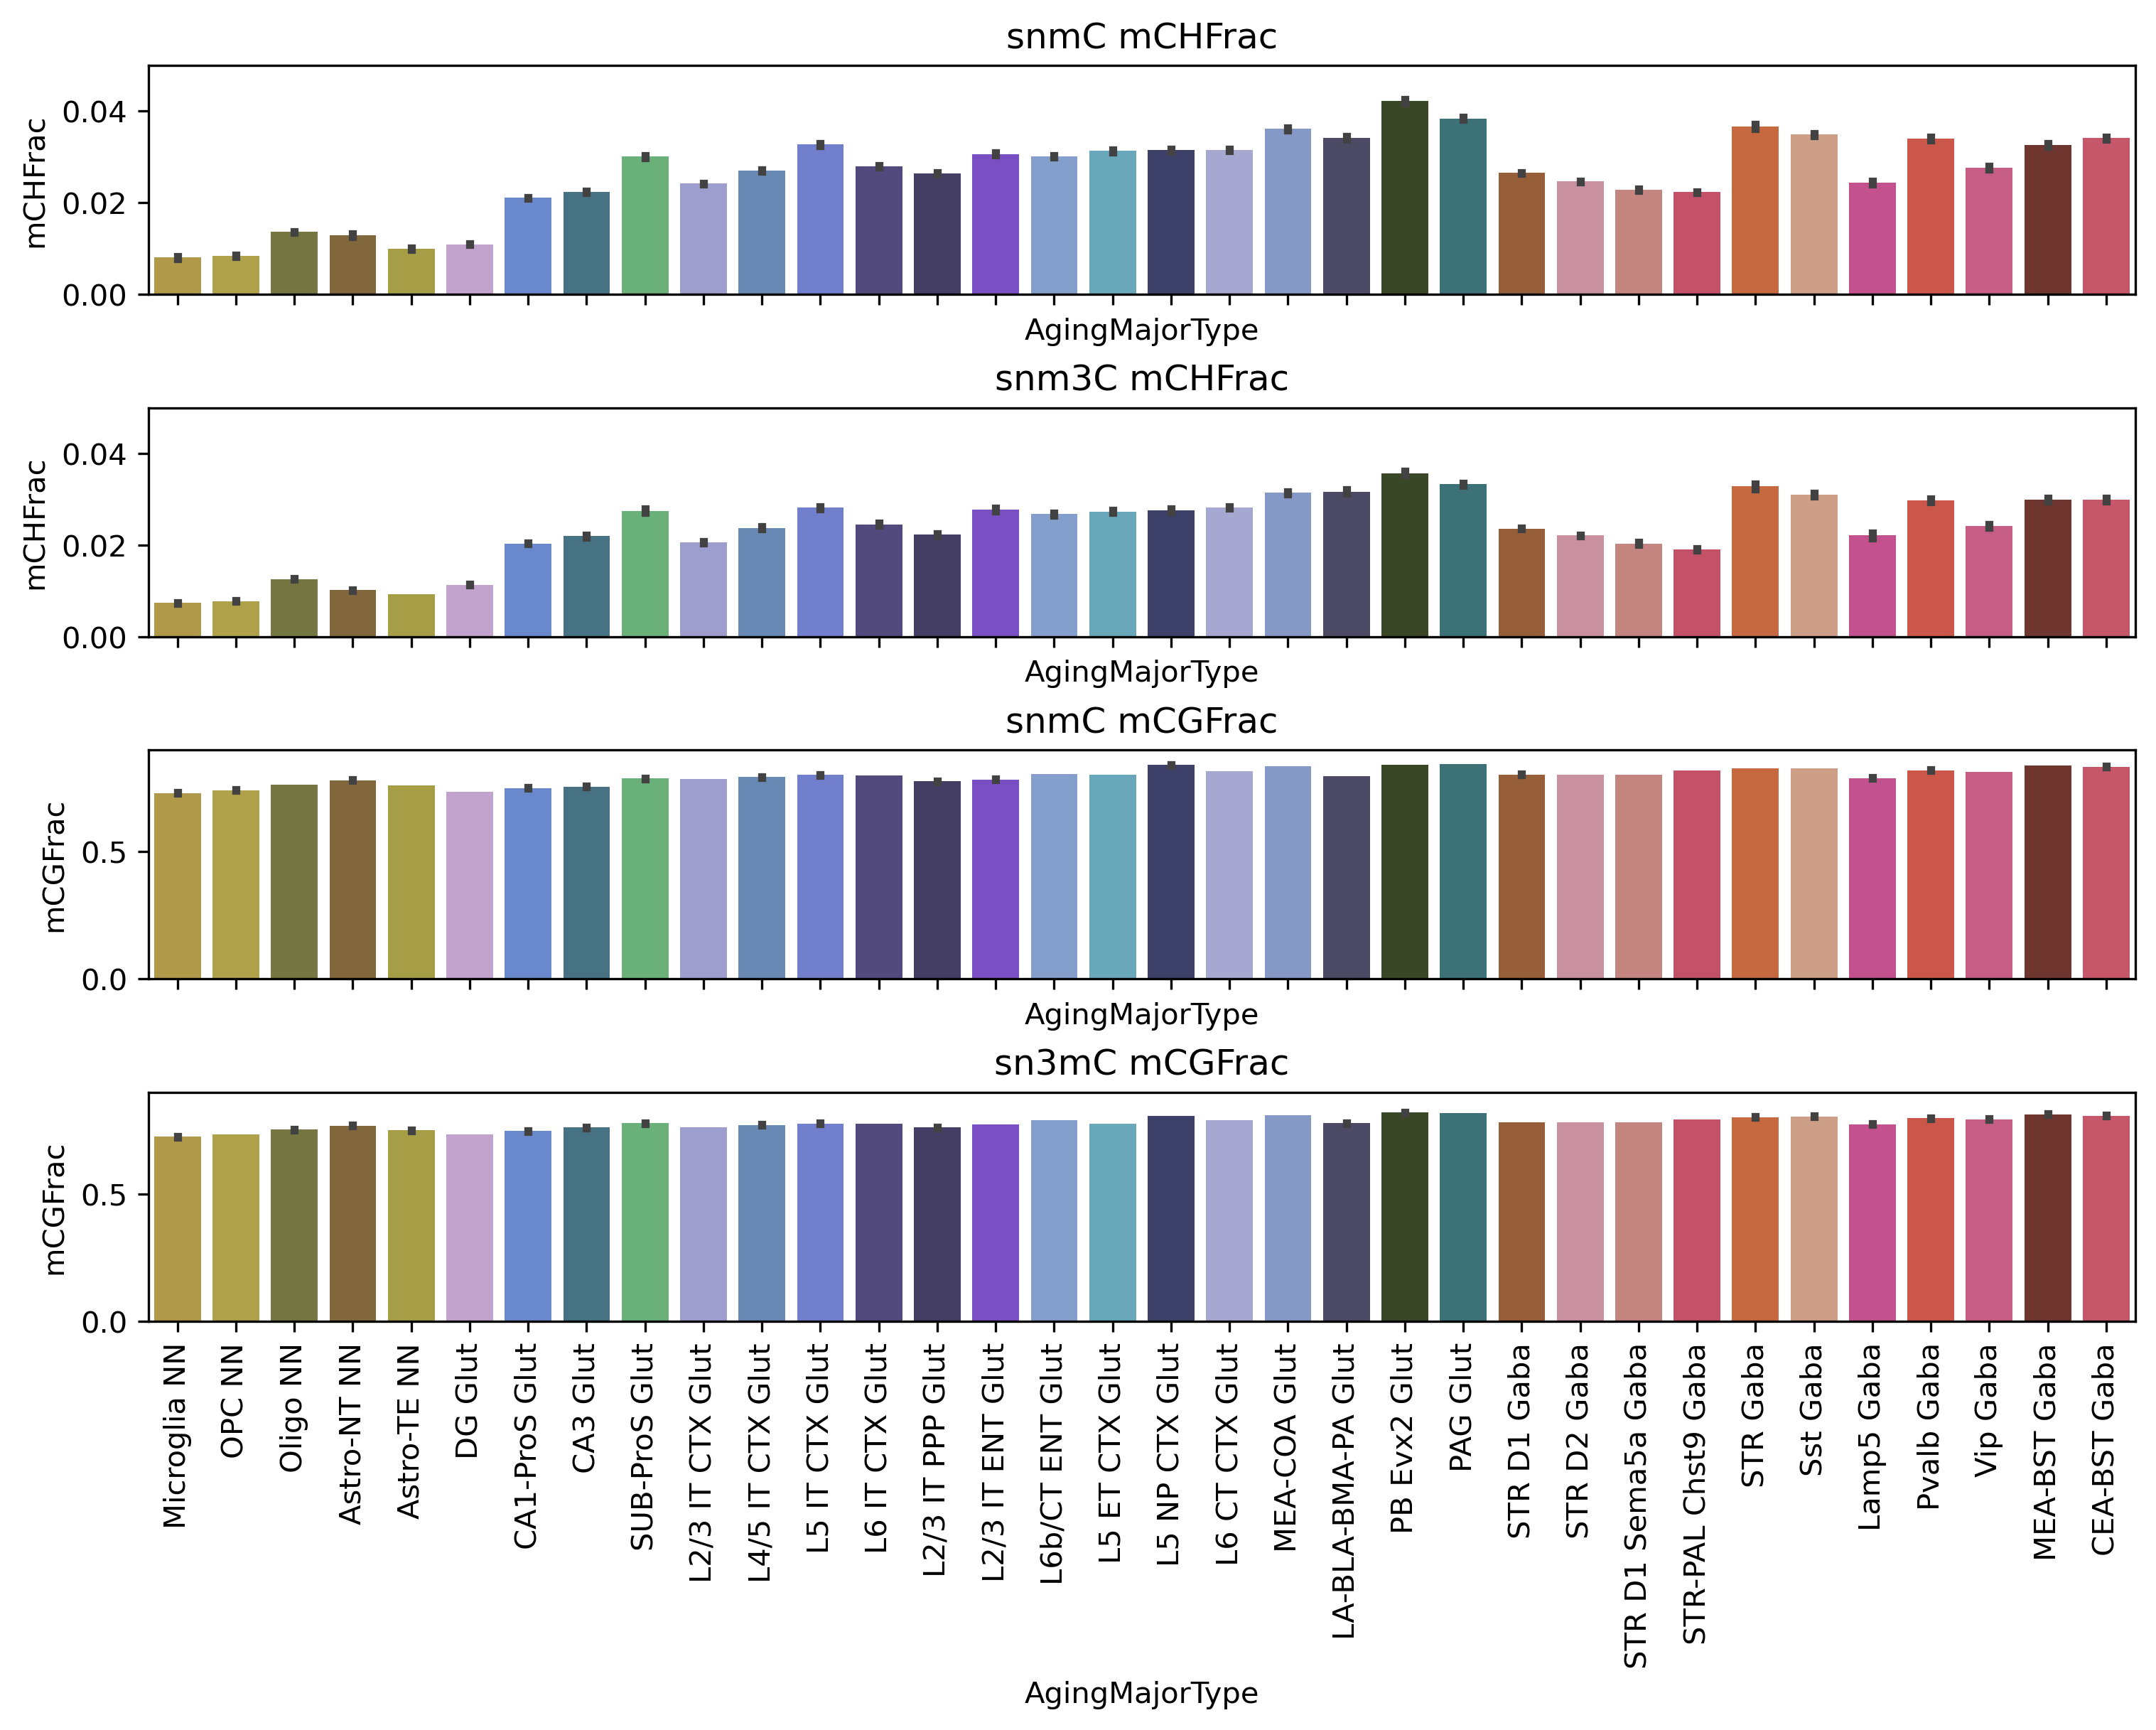

In [24]:
fig,axes = plt.subplots(figsize = (10,8),ncols = 1, nrows =4, dpi = 300, sharex = True,constrained_layout= True)

ax = axes[0]
_var = 'mCHFrac'
sns.barplot(data=mc_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue="AgingMajorType",
            palette = mt_pelatte,
            dodge=False,)
ax.set_ylim(0,0.05)
ax.set_title(f"snmC {_var}")
ax.legend().remove()

ax = axes[1]
_var = 'mCHFrac'
sns.barplot(data=m3c_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue="AgingMajorType",
            palette = mt_pelatte,
            dodge=False,)
ax.set_ylim(0,0.05)
ax.set_title(f"snm3C {_var}")
ax.legend().remove()

ax = axes[2]
_var = 'mCGFrac'
sns.barplot(data=mc_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue="AgingMajorType",
            palette = mt_pelatte,
            dodge=False,)
ax.set_ylim(0,0.9)
ax.set_title(f"snmC {_var}")
ax.legend().remove()

ax = axes[3]
_var = 'mCGFrac'
sns.barplot(data=m3c_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue="AgingMajorType",
            palette = mt_pelatte,
            dodge=False,)
ax.set_ylim(0,0.9)
ax.set_title(f"sn3mC {_var}")
ax.legend().remove()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig(f'figure/ByCellType.Global.Methylation.pdf',  bbox_inches="tight")  
plt.show()

## plot by cell type age

In [28]:
from amb import *
age_palette = get_age_palette()

In [31]:
age_palette = {'8wk': '#480080', '9mo': '#e23c5d', '18mo': '#ffb42c'}

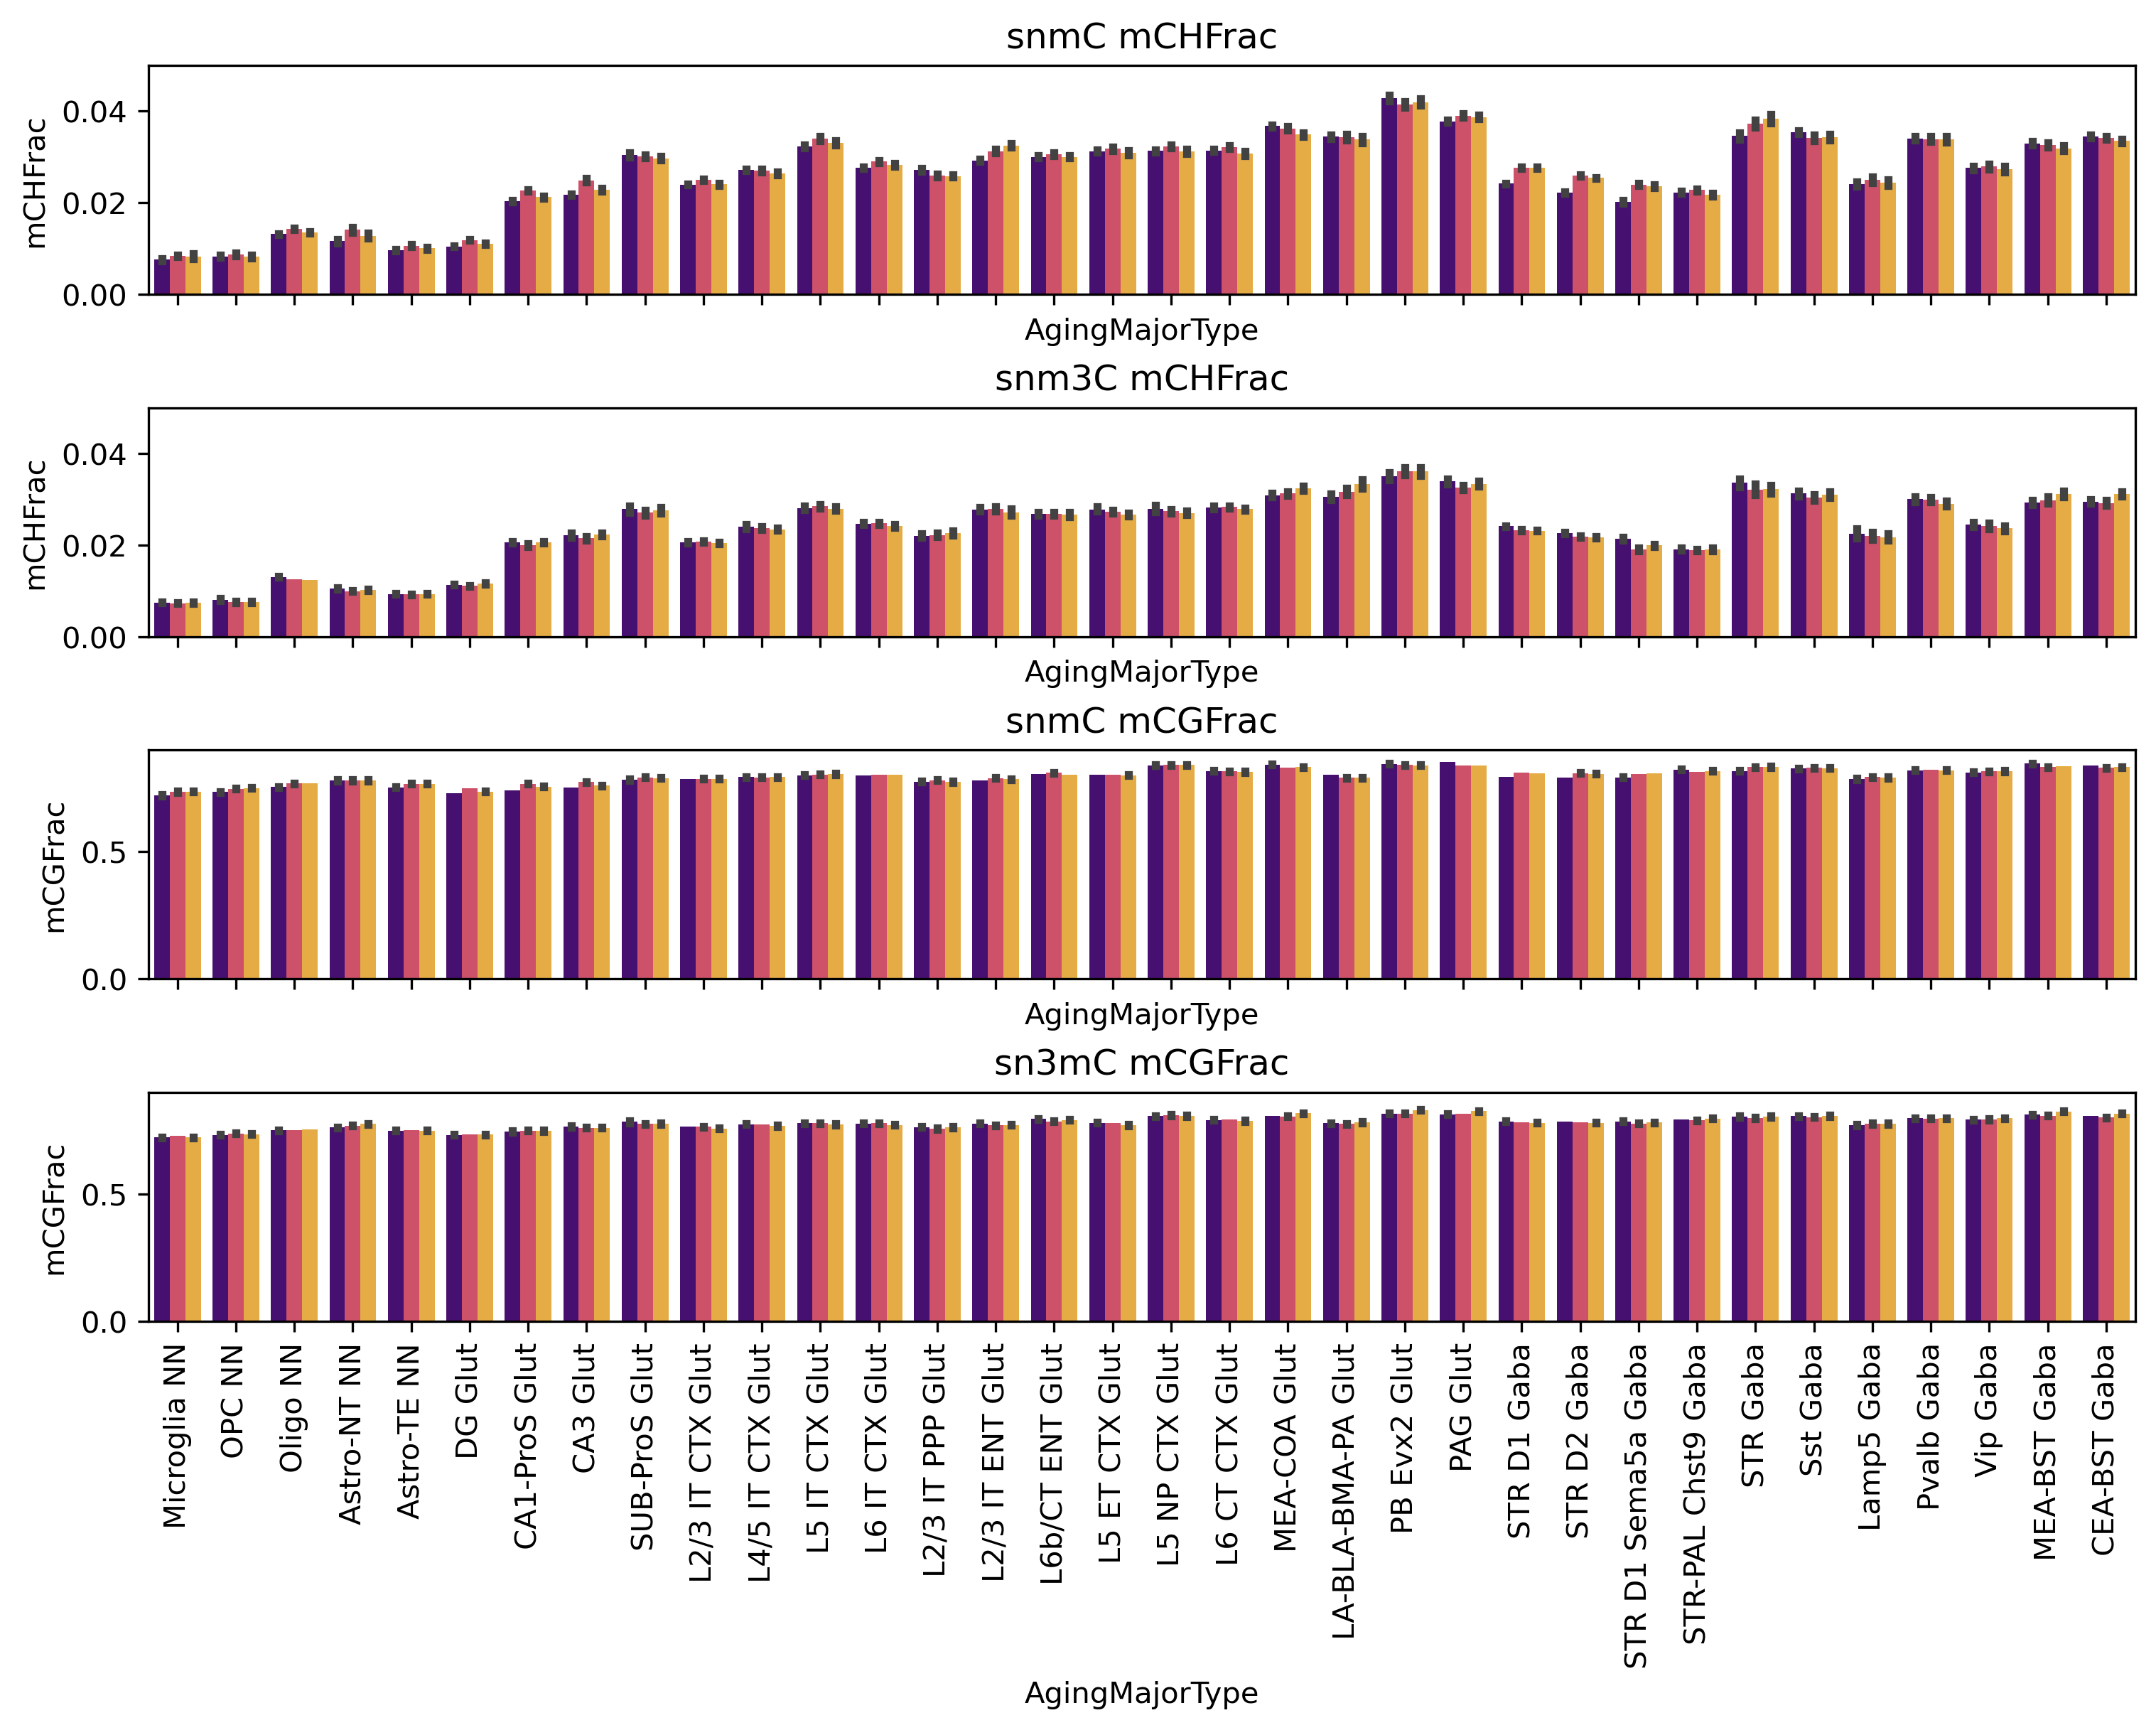

In [41]:
fig,axes = plt.subplots(figsize = (10,8),ncols = 1, nrows =4, dpi = 300, sharex = True,constrained_layout= True)

ax = axes[0]
_var = 'mCHFrac'
sns.barplot(data=mc_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue_order = ['8wk','9mo','18mo'],
            hue="Age",
            palette = age_palette,
            dodge=True,)
ax.set_ylim(0,0.05)
ax.set_title(f"snmC {_var}")
ax.legend().remove()

ax = axes[1]
_var = 'mCHFrac'
sns.barplot(data=m3c_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue_order = ['8wk','9mo','18mo'],
            hue="Age",
            palette = age_palette,
            dodge=True,)
ax.set_ylim(0,0.05)
ax.set_title(f"snm3C {_var}")
ax.legend().remove()

ax = axes[2]
_var = 'mCGFrac'
sns.barplot(data=mc_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue_order = ['8wk','9mo','18mo'],
            hue="Age",
            palette = age_palette,
            dodge=True,)
ax.set_ylim(0,0.9)
ax.set_title(f"snmC {_var}")
ax.legend().remove()

ax = axes[3]
_var = 'mCGFrac'
sns.barplot(data=m3c_meta, 
            ax = ax,
            x="AgingMajorType", 
            y=_var, 
            order = ordered_shared_cts,
            hue_order = ['8wk','9mo','18mo'],
            hue="Age",
            palette = age_palette,
            dodge=True,)
ax.set_ylim(0,0.9)
ax.set_title(f"sn3mC {_var}")
ax.legend().remove()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig(f'figure/ByCellType.Age.Global.Methylation.pdf',  bbox_inches="tight")  
plt.show()

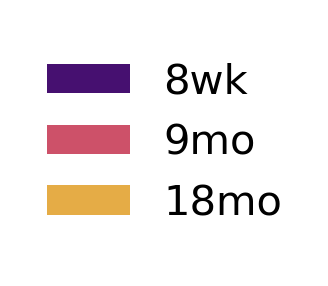

In [40]:
# Create a second subplot for the legend
fig_legend, ax_legend = plt.subplots(figsize=(1, 1), dpi=300)
# Plot an empty plot for the legend
ax_legend.plot([], [])
# Set the legend using the handles and labels from the previous subplot
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', frameon=False)
# Remove ticks and labels from the legend subplot
ax_legend.axis('off')

# Show both the bar plot and the legend
plt.show()

fig_legend.savefig(f'figure/rage_legend.pdf',  bbox_inches="tight")   

In [61]:
all_df = []
for ct, tmpdf in mc_meta.groupby('AgingMajorType'):
    tmpdf = tmpdf.groupby('Age').mean().T
    tmpdf = tmpdf['18mo'] - tmpdf['8wk']
    tmpdf = pd.DataFrame(tmpdf, columns = [ct])
    all_df.append(tmpdf)
all_df = pd.concat(all_df, axis = 1)

In [69]:
all_mc_df = pd.concat([pd.DataFrame((group.groupby('Age').mean().T['18mo'] - group.groupby('Age').mean().T['8wk']), columns=[ct])
        for ct, group in mc_meta.groupby('AgingMajorType')], axis=1)
all_m3c_df = pd.concat([pd.DataFrame((group.groupby('Age').mean().T['18mo'] - group.groupby('Age').mean().T['8wk']), columns=[ct])
        for ct, group in m3c_meta.groupby('AgingMajorType')], axis=1)

In [71]:
all_mc_df

,Astro-NT NN,Astro-TE NN,CA1-ProS Glut,CA3 Glut,CEA-BST Gaba,DG Glut,L2/3 IT CTX Glut,L2/3 IT ENT Glut,L2/3 IT PPP Glut,L4/5 IT CTX Glut,...,PB Evx2 Glut,Pvalb Gaba,STR D1 Gaba,STR D1 Sema5a Gaba,STR D2 Gaba,STR Gaba,STR-PAL Chst9 Gaba,SUB-ProS Glut,Sst Gaba,Vip Gaba
mCHFrac,0.001201,0.000481,0.000861,0.001154,-0.000933,0.000581,0.000016,0.003234,-0.001352,-0.000776,...,-0.000900,-0.000202,0.003451,0.003408,0.003191,0.003717,-0.000471,-0.000708,-0.001096,-0.000230
mCGFrac,-0.001098,0.013447,0.015775,0.007532,-0.006689,0.007470,0.001368,0.004555,-0.000246,0.001040,...,-0.005702,0.000246,0.014324,0.016305,0.014506,0.015559,-0.004940,0.006314,0.001431,0.004291


In [72]:
all_m3c_df

,Astro-NT NN,Astro-TE NN,CA1-ProS Glut,CA3 Glut,CEA-BST Gaba,DG Glut,L2/3 IT CTX Glut,L2/3 IT ENT Glut,L2/3 IT PPP Glut,L4/5 IT CTX Glut,...,PB Evx2 Glut,Pvalb Gaba,STR D1 Gaba,STR D1 Sema5a Gaba,STR D2 Gaba,STR Gaba,STR-PAL Chst9 Gaba,SUB-ProS Glut,Sst Gaba,Vip Gaba
mCHFrac,-0.000373,6.706983e-07,0.000007,0.000207,0.001660,0.000199,-0.000108,-0.000591,0.000577,-0.000529,...,0.001049,-0.000956,-0.000944,-0.001413,-0.000993,-0.001410,-0.000067,-0.000231,-0.000225,-0.000858
mCGFrac,0.014986,-1.215955e-04,0.002922,-0.005635,0.009025,0.000660,-0.006417,-0.006445,-0.000531,-0.006383,...,0.014034,0.000103,-0.005679,-0.003142,-0.004292,-0.000081,0.003252,-0.008055,0.000467,0.004838
